<a href="https://colab.research.google.com/github/ZainabBee24/house-price-prediction-/blob/main/_Supervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction using Supervised Learning

## Problem Statement:
Predict the price of houses based on features like area, number of rooms, and amenities.

## Dataset Description:
The dataset consists of 13 columns including:
* Numerical Features: area, bedrooms, bathrooms, stories, parking
* Categorical/Binary Features: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus

No missing or duplicated values.

# Importing Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Data Loading and Exploration

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head()
#df.isnull().sum()
#df.duplicated().sum()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preprocessing:
* Encode categorical columns using Label Encoding.
* Split dataset into features (X) and target (y).
* Train-Test Split (80-20).

In [ ]:
# Encode Categorical Variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop('price', axis=1)
y = df['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Training

In [ ]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

## Model Evaluation:
Evaluate model performance using MAE, MSE, RMSE, and R² Score.

In [ ]:
# Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.0352
Root Mean Squared Error (RMSE): 1331071.4167895108
R2 Score: 0.6494754192267803


## Visualizations:
* Scatter plot of Actual vs Predicted Prices
* Residual Distribution Plot

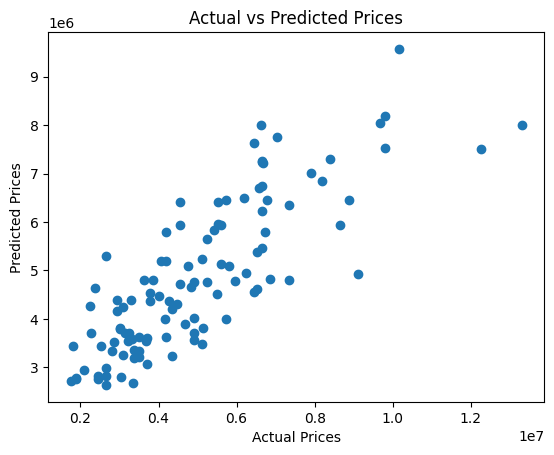

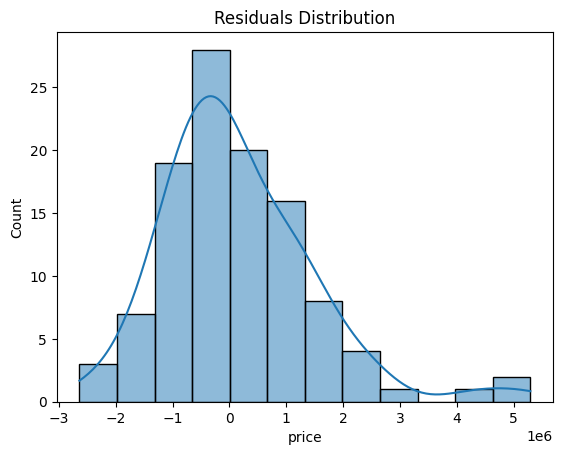

In [ ]:
# Visualization: Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

#Model Evaluation Summary

##Mean Absolute Error (MAE): ₦979,680
→ On average, the model's predictions are off by approximately ₦980K.

##Root Mean Squared Error (RMSE): ₦1,331,071
→ Larger deviations (outliers) have a stronger impact. So, predictions can be off by around ₦1.33M in worst cases.

##R² Score: 0.649
→ About 64.9% of the variance in house prices is explained by the model. This is decent for a simple Linear Regression model, but there’s room for improvement with more advanced algorithms or feature engineering.

## Conclusion:
The Linear Regression model achieved an R² score of 64.9%, indicating it can explain approximately two-thirds of the variance in house prices based on the selected features. While the model’s average prediction error is around ₦980K, the Root Mean Squared Error suggests that larger prediction deviations are possible, which might be reduced by incorporating more sophisticated models or additional features.

####Project submitted by **Zainab Adam.** Generative AI and Data Science Intern (Intermediate)